# Use case: multi-band photometry

We want to build color profiles by running `ellipse` on an image, and then, using the isophotes so derived, to get isophotes on another image of the same object. 

In this example we use public domain images of NGC1068 from the Hubble Space Telescope archive (https://www.spacetelescope.org/projects/fits_liberator/ngc1068data/). 

One of them is a wide-band ~R image, the other is a narrow-band H$\alpha$ + [NII]. We use the higher S/N wide band image to fit the isophotes; then, loop over the geometry of these isophotes to extract samples from the narrow-band, lower S/N image, without fitting. This should minimize fitting problems caused by the lumpiness and lower S/N of the narrow-band image. 

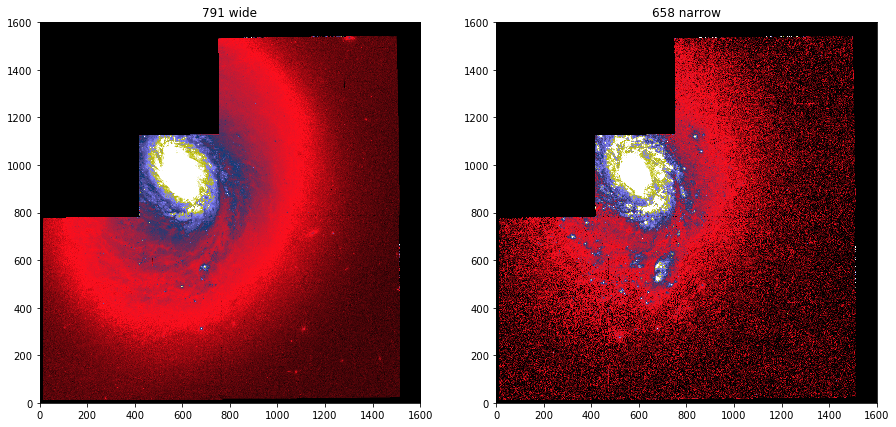

In [33]:
from astropy.io import fits
from astropy.utils.data import download_file

# This was copied from the astropy-tutorials/Contributing.md file,
# but doesn't work (generates a 'unknown url' error).
# tutorialpath = ''
# 791wmos = download_file(tutorialpath + '791wmos.fits', cache=True)
# image = fits.open(791wmos)
image = fits.open('791wmos.fits')
pixel_data_791 = image[0].data
image = fits.open('658nmos.fits')
pixel_data_658 = image[0].data

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))
limits = [0,1600]
ax1.imshow(pixel_data_791, cmap=cm.gist_stern, vmin=0, vmax=400)
ax1.set_xlim(limits)
ax1.set_ylim(limits)
ax1.set_title("791 wide")
ax2.imshow(pixel_data_658, cmap=cm.gist_stern, vmin=0, vmax=50)
ax2.set_xlim(limits)
ax2.set_ylim(limits)
ax2.set_title("658 narrow")